## Step 1 - Data analysis & Pre-processing

In [38]:
import pandas as pd
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#This code reads data from the csv file into a Pandas DataFrame and displays the first 5 rows of the DataFrame.
df = pd.read_csv('Student_Weight_Status_Category_Reporting_Results__2010-2019_20240206.csv')

# First 5 rows of the DataFrame
df.head()

,Location Code,County,Area Name,Region,Year Reported,Number Overweight,Percent Overweight,Number Obese,Percent Obese,Number Overweight or Obese,Percent Overweight or Obese,Grade Level,Number Healthy Weight,Percent Healthy Weight,Sex
0,0,STATEWIDE (EXCLUDING NYC),STATEWIDE (EXCLUDING NYC),STATEWIDE (EXCLUDING NYC),2010-2012,77813.0,16.2,84578.0,17.6,162391.0,33.7,DISTRICT TOTAL,308259.0,0.641,ALL
1,0,STATEWIDE (EXCLUDING NYC),STATEWIDE (EXCLUDING NYC),STATEWIDE (EXCLUDING NYC),2010-2012,38536.0,16.3,38261.0,16.2,76797.0,32.6,DISTRICT TOTAL,153898.0,0.653,FEMALE
2,0,STATEWIDE (EXCLUDING NYC),STATEWIDE (EXCLUDING NYC),STATEWIDE (EXCLUDING NYC),2010-2012,39277.0,16.0,46317.0,18.9,85594.0,34.9,DISTRICT TOTAL,154361.0,0.629,MALE
3,0,STATEWIDE (EXCLUDING NYC),STATEWIDE (EXCLUDING NYC),STATEWIDE (EXCLUDING NYC),2010-2012,44970.0,15.8,48843.0,17.2,93813.0,33.0,ELEMENTARY,184195.0,0.648,ALL
4,0,STATEWIDE (EXCLUDING NYC),STATEWIDE (EXCLUDING NYC),STATEWIDE (EXCLUDING NYC),2010-2012,22092.0,15.9,22464.0,16.2,44556.0,32.2,ELEMENTARY,90927.0,0.656,FEMALE


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32025 entries, 0 to 32024
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Location Code                32025 non-null  int64  
 1   County                       31521 non-null  object 
 2   Area Name                    32025 non-null  object 
 3   Region                       4680 non-null   object 
 4   Year Reported                32025 non-null  object 
 5   Number Overweight            29676 non-null  float64
 6   Percent Overweight           29675 non-null  float64
 7   Number Obese                 29869 non-null  float64
 8   Percent Obese                29869 non-null  float64
 9   Number Overweight or Obese   30501 non-null  float64
 10  Percent Overweight or Obese  30460 non-null  float64
 11  Grade Level                  32019 non-null  object 
 12  Number Healthy Weight        31142 non-null  float64
 13  Percent Healthy 

In [41]:
df.shape

(32025, 15)

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location Code,32025.0,354823.934333,214814.105810,0.000,150301.000,401501.0000,572702.000,680801.0
Number Overweight,29676.0,308.663769,2201.531373,0.000,19.000,42.0000,104.000,83095.0
Percent Overweight,29675.0,17.114854,5.065644,0.000,14.700,16.6000,18.800,100.0
Number Obese,29869.0,322.165255,2299.432235,5.000,20.000,43.0000,108.000,87115.0
Percent Obese,29869.0,18.816452,7.220643,1.300,14.300,18.3000,22.400,100.0
Number Overweight or Obese,30501.0,615.760664,4444.913640,0.000,37.000,82.0000,205.000,169111.0
Percent Overweight or Obese,30460.0,35.108854,8.816243,0.000,29.900,34.9000,40.000,100.0
Number Healthy Weight,31142.0,1136.673528,8327.096120,5.000,63.000,153.0000,390.000,316041.0
Percent Healthy Weight,31140.0,0.642213,0.096524,0.133,0.587,0.6355,0.687,1.0


In [43]:
#This code checks the dataset for null values and returns the sum of all the missing values for each feature.
df.isnull().sum()

Location Code                      0
County                           504
Area Name                          0
Region                         27345
Year Reported                      0
Number Overweight               2349
Percent Overweight              2350
Number Obese                    2156
Percent Obese                   2156
Number Overweight or Obese      1524
Percent Overweight or Obese     1565
Grade Level                        6
Number Healthy Weight            883
Percent Healthy Weight           885
Sex                                0
dtype: int64

In [44]:
df.dtypes

Location Code                    int64
County                          object
Area Name                       object
Region                          object
Year Reported                   object
Number Overweight              float64
Percent Overweight             float64
Number Obese                   float64
Percent Obese                  float64
Number Overweight or Obese     float64
Percent Overweight or Obese    float64
Grade Level                     object
Number Healthy Weight          float64
Percent Healthy Weight         float64
Sex                             object
dtype: object

In [45]:
# Handling Missing values

import pandas as pd

# Drop the 'Region' column
df_no_region = df.drop('Region', axis=1)

print("Number of missing values before handling:")
print(df_no_region.isnull().sum())

# Drop rows with missing values
df_cleaned = df_no_region.dropna()

print("\nNumber of missing values after handling:")
print(df_cleaned.isnull().sum())


Number of missing values before handling:
Location Code                     0
County                          504
Area Name                         0
Year Reported                     0
Number Overweight              2349
Percent Overweight             2350
Number Obese                   2156
Percent Obese                  2156
Number Overweight or Obese     1524
Percent Overweight or Obese    1565
Grade Level                       6
Number Healthy Weight           883
Percent Healthy Weight          885
Sex                               0
dtype: int64

Number of missing values after handling:
Location Code                  0
County                         0
Area Name                      0
Year Reported                  0
Number Overweight              0
Percent Overweight             0
Number Obese                   0
Percent Obese                  0
Number Overweight or Obese     0
Percent Overweight or Obese    0
Grade Level                    0
Number Healthy Weight          0
Per

In [46]:
df_cleaned

,Location Code,County,Area Name,Year Reported,Number Overweight,Percent Overweight,Number Obese,Percent Obese,Number Overweight or Obese,Percent Overweight or Obese,Grade Level,Number Healthy Weight,Percent Healthy Weight,Sex
0,0,STATEWIDE (EXCLUDING NYC),STATEWIDE (EXCLUDING NYC),2010-2012,77813.0,16.2,84578.0,17.6,162391.0,33.7,DISTRICT TOTAL,308259.0,0.641,ALL
1,0,STATEWIDE (EXCLUDING NYC),STATEWIDE (EXCLUDING NYC),2010-2012,38536.0,16.3,38261.0,16.2,76797.0,32.6,DISTRICT TOTAL,153898.0,0.653,FEMALE
2,0,STATEWIDE (EXCLUDING NYC),STATEWIDE (EXCLUDING NYC),2010-2012,39277.0,16.0,46317.0,18.9,85594.0,34.9,DISTRICT TOTAL,154361.0,0.629,MALE
3,0,STATEWIDE (EXCLUDING NYC),STATEWIDE (EXCLUDING NYC),2010-2012,44970.0,15.8,48843.0,17.2,93813.0,33.0,ELEMENTARY,184195.0,0.648,ALL
4,0,STATEWIDE (EXCLUDING NYC),STATEWIDE (EXCLUDING NYC),2010-2012,22092.0,15.9,22464.0,16.2,44556.0,32.2,ELEMENTARY,90927.0,0.656,FEMALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32020,680801,YATES,DUNDEE CENTRAL SCHOOL DISTRICT,2018-2019,12.0,17.9,17.0,25.4,29.0,43.3,ELEMENTARY,38.0,0.567,FEMALE
32021,680801,YATES,DUNDEE CENTRAL SCHOOL DISTRICT,2018-2019,14.0,19.2,17.0,23.3,31.0,42.5,ELEMENTARY,42.0,0.575,MALE
32022,680801,YATES,DUNDEE CENTRAL SCHOOL DISTRICT,2018-2019,15.0,16.7,21.0,23.3,36.0,40.0,MIDDLE/HIGH,54.0,0.600,ALL
32023,680801,YATES,DUNDEE CENTRAL SCHOOL DISTRICT,2018-2019,7.0,16.3,7.0,16.3,14.0,32.6,MIDDLE/HIGH,29.0,0.674,FEMALE


In [47]:
# Detecting and Handling Outliers

import pandas as pd
from scipy import stats

print("Summary statistics before handling outliers:")
print(df_cleaned.describe())

# Define a z-score threshold for identifying outliers
z_score_threshold = 3

# Calculate the z-scores for each numeric column
z_scores = stats.zscore(df_cleaned.select_dtypes(include=['float64']))

# Identify outliers based on the z-score threshold
outliers_mask = (abs(z_scores) > z_score_threshold).any(axis=1)

print("\nNumber of outliers detected:", outliers_mask.sum())

# remove the outliers
df_no_outliers = df_cleaned[~outliers_mask]

# Display the summary statistics after handling outliers
print("\nSummary statistics after handling outliers:")
print(df_no_outliers.describe())


Summary statistics before handling outliers:
       Location Code  Number Overweight  Percent Overweight  Number Obese  \
count   28555.000000       28555.000000        28555.000000  28555.000000   
mean   361776.116022         230.583295           16.865484    242.218771   
std    211564.001807        2082.001062            3.949320   2183.979794   
min         0.000000           0.000000            0.000000      5.000000   
25%    160000.000000          20.000000           14.600000     21.000000   
50%    411701.000000          43.000000           16.600000     44.000000   
75%    572901.000000         100.000000           18.700000    105.000000   
max    680801.000000       83095.000000           73.900000  87115.000000   

       Percent Obese  Number Overweight or Obese  Percent Overweight or Obese  \
count   28555.000000                28555.000000                 28555.000000   
mean       18.392635                  472.768447                    35.260823   
std         6.1691

In [48]:
df_no_outliers

,Location Code,County,Area Name,Year Reported,Number Overweight,Percent Overweight,Number Obese,Percent Obese,Number Overweight or Obese,Percent Overweight or Obese,Grade Level,Number Healthy Weight,Percent Healthy Weight,Sex
72,10000,ALBANY,ALBANY,2010-2012,1514.0,15.0,1802.0,17.9,3316.0,32.9,DISTRICT TOTAL,6563.0,0.651,ALL
73,10000,ALBANY,ALBANY,2010-2012,737.0,15.0,836.0,17.0,1573.0,32.0,DISTRICT TOTAL,3233.0,0.657,FEMALE
74,10000,ALBANY,ALBANY,2010-2012,777.0,15.1,966.0,18.7,1743.0,33.8,DISTRICT TOTAL,3330.0,0.645,MALE
75,10000,ALBANY,ALBANY,2010-2012,855.0,15.6,895.0,16.4,1750.0,32.0,ELEMENTARY,3615.0,0.661,ALL
76,10000,ALBANY,ALBANY,2010-2012,421.0,16.0,412.0,15.6,833.0,31.6,ELEMENTARY,1735.0,0.659,FEMALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32020,680801,YATES,DUNDEE CENTRAL SCHOOL DISTRICT,2018-2019,12.0,17.9,17.0,25.4,29.0,43.3,ELEMENTARY,38.0,0.567,FEMALE
32021,680801,YATES,DUNDEE CENTRAL SCHOOL DISTRICT,2018-2019,14.0,19.2,17.0,23.3,31.0,42.5,ELEMENTARY,42.0,0.575,MALE
32022,680801,YATES,DUNDEE CENTRAL SCHOOL DISTRICT,2018-2019,15.0,16.7,21.0,23.3,36.0,40.0,MIDDLE/HIGH,54.0,0.600,ALL
32023,680801,YATES,DUNDEE CENTRAL SCHOOL DISTRICT,2018-2019,7.0,16.3,7.0,16.3,14.0,32.6,MIDDLE/HIGH,29.0,0.674,FEMALE


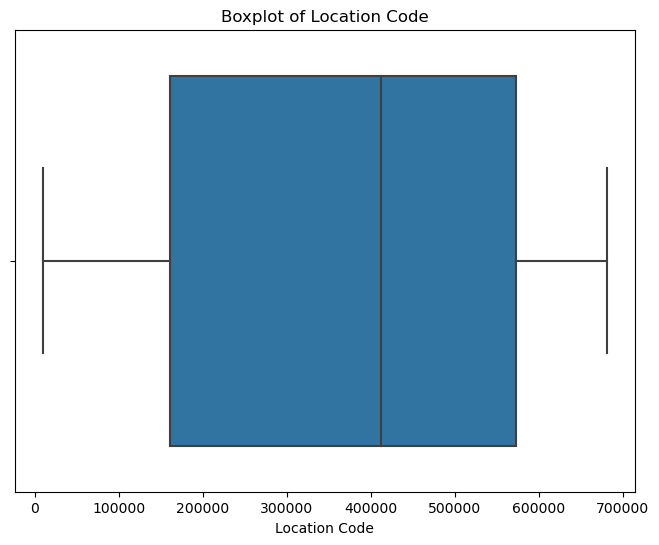

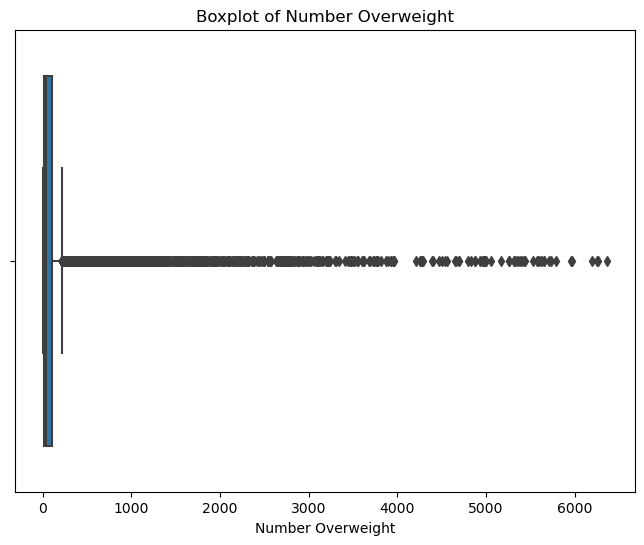

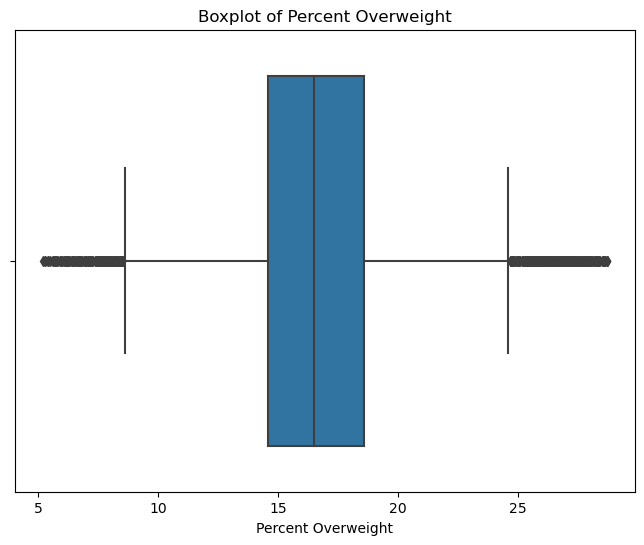

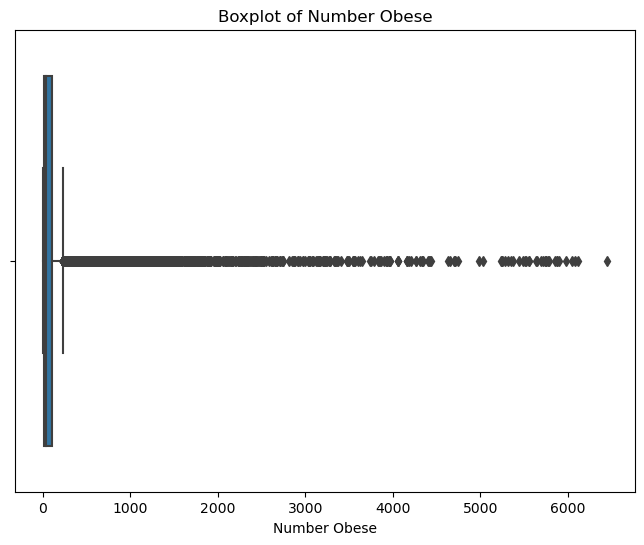

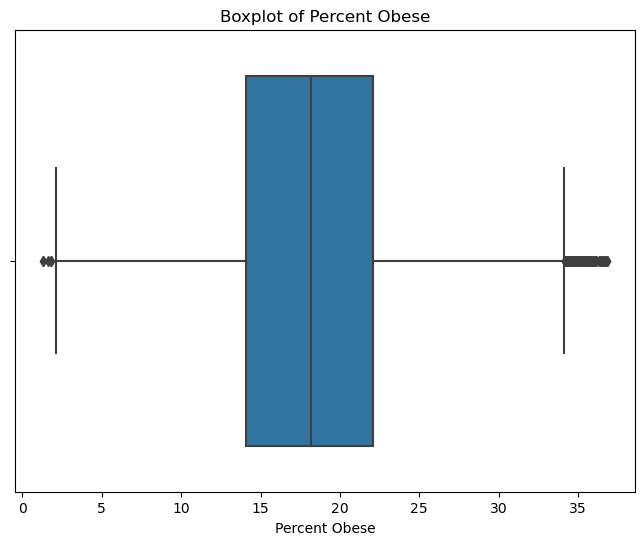

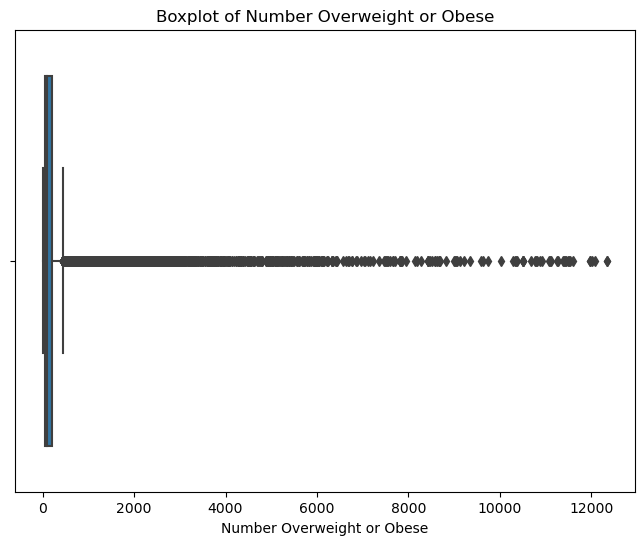

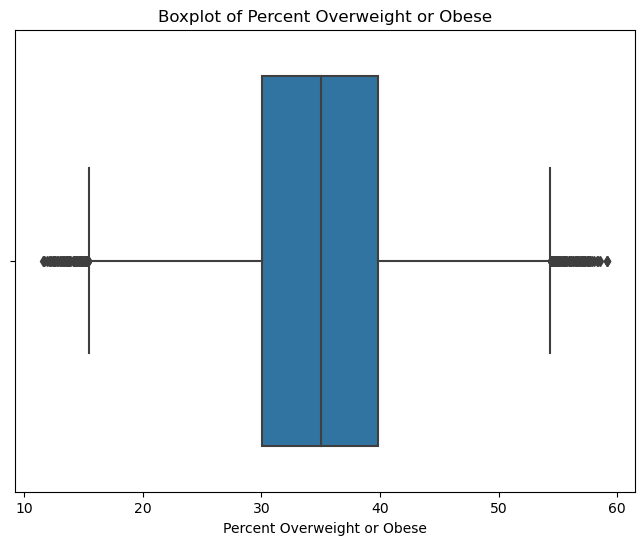

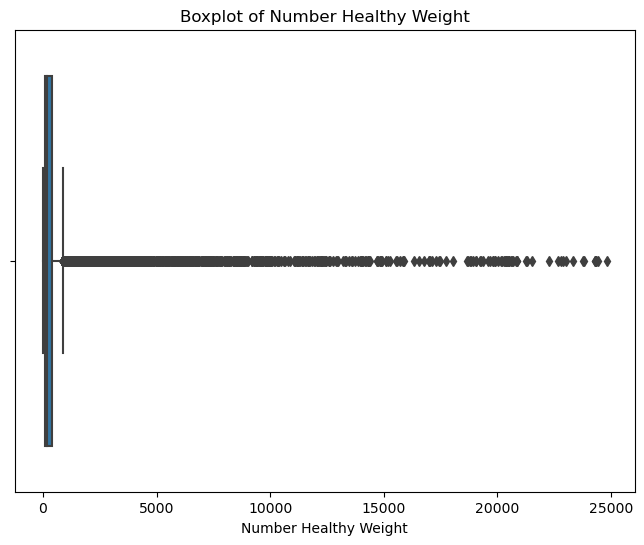

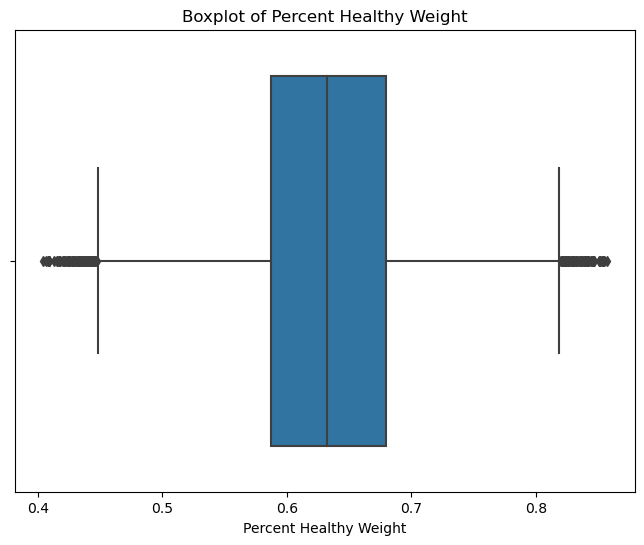

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns to plot boxplots
numeric_columns_to_plot = df_no_outliers.select_dtypes(include=['float64', 'int64']).columns

# boxplots for each numeric column
for col in numeric_columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


C:\Users\SARVESH\AppData\Local\Temp\ipykernel_2652\3283080665.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_no_outliers.corr()


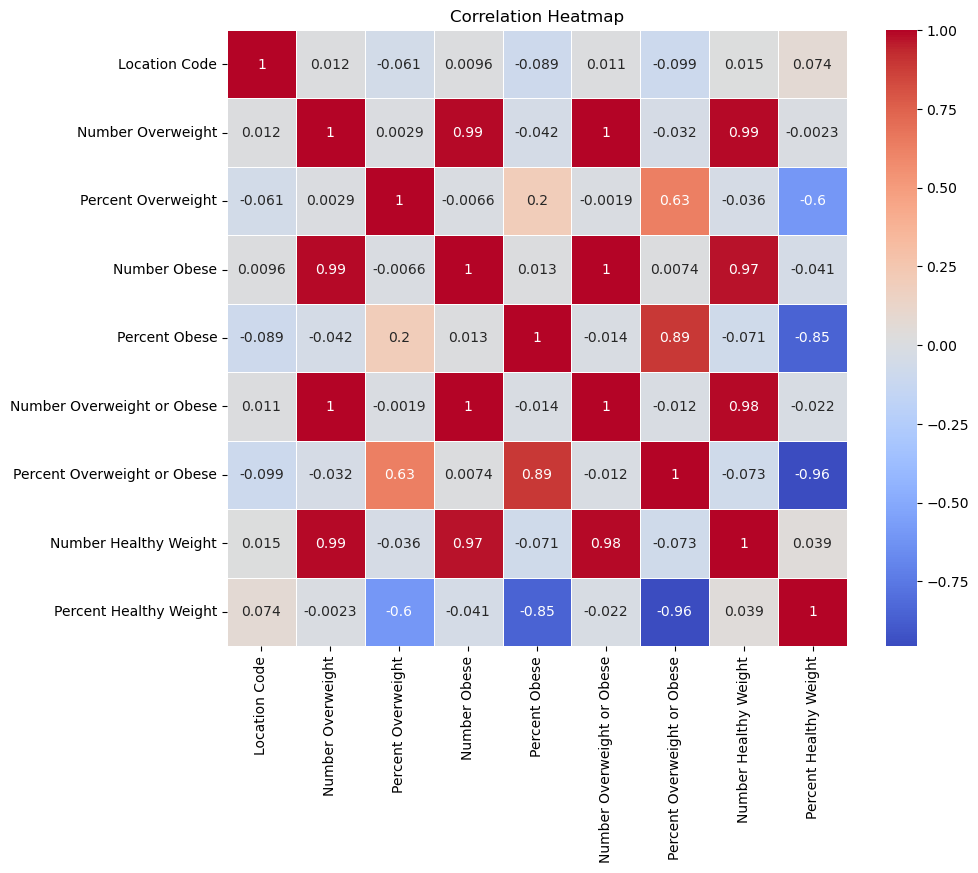

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_no_outliers.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


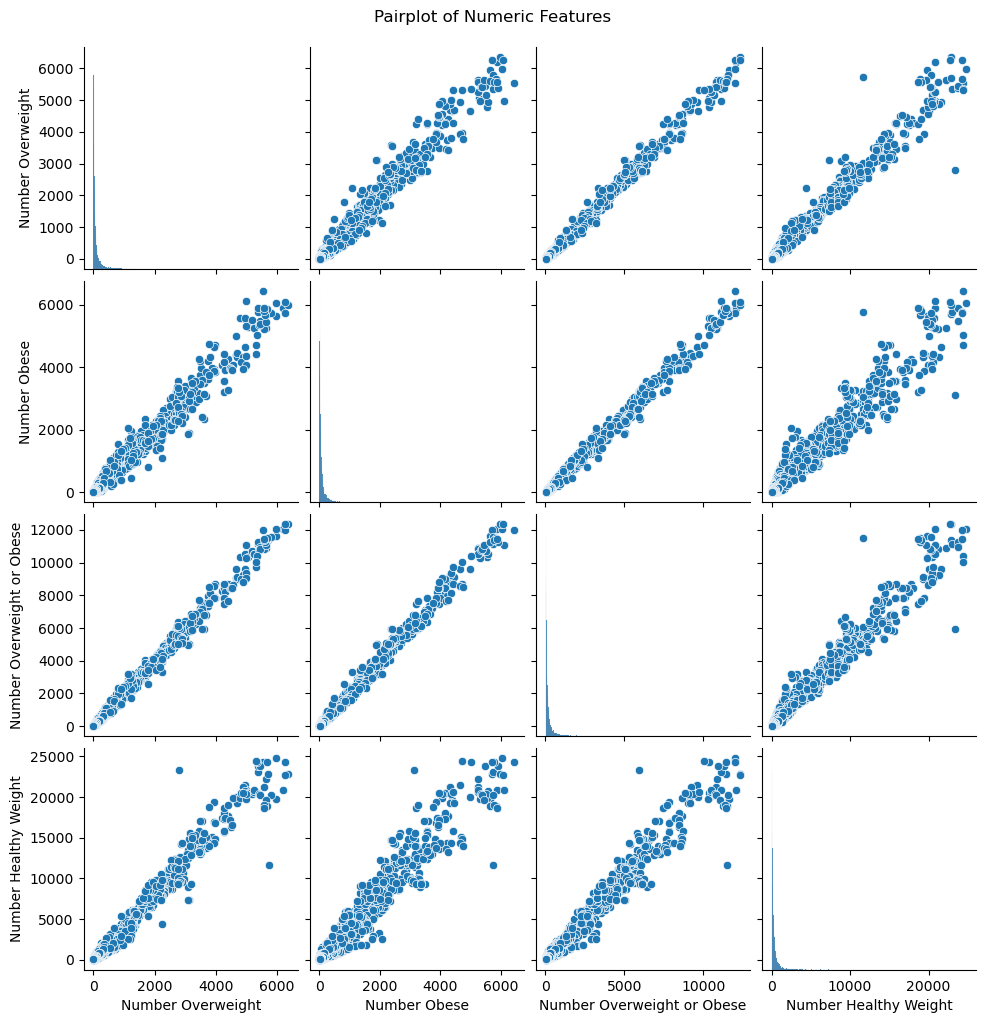

In [51]:
# a subset of numeric columns for pairplot
numeric_columns_for_pairplot = ['Number Overweight', 'Number Obese', 'Number Overweight or Obese', 'Number Healthy Weight']

# Create a pairplot
sns.pairplot(df_no_outliers[numeric_columns_for_pairplot])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()


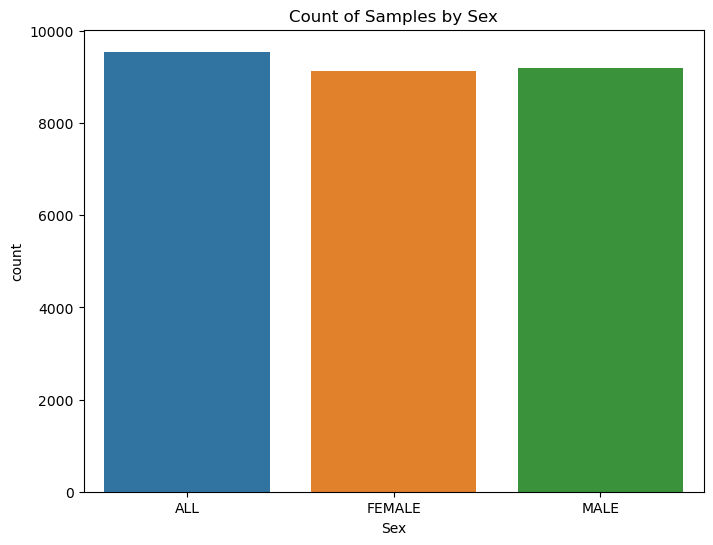

In [52]:
# Count plot of Samples by'Sex' feature
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=df_no_outliers)
plt.title('Count of Samples by Sex')
plt.show()


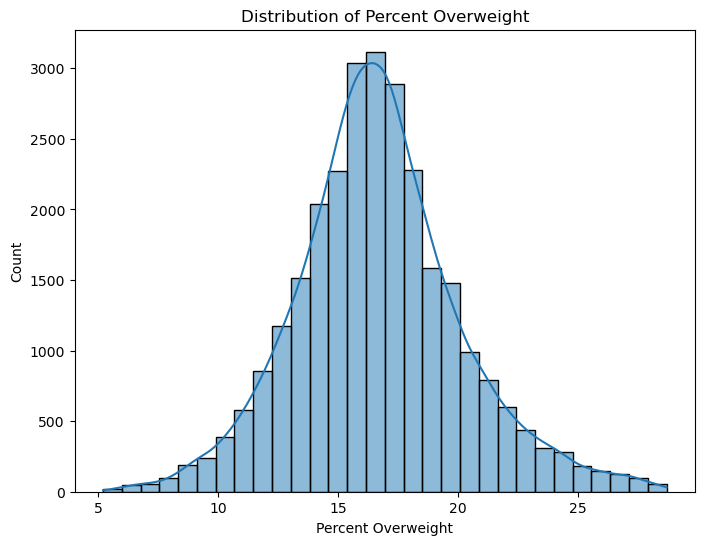

In [53]:
# Distribution plot of'Percent Overweight'
plt.figure(figsize=(8, 6))
sns.histplot(df_no_outliers['Percent Overweight'], kde=True, bins=30)
plt.title('Distribution of Percent Overweight')
plt.show()


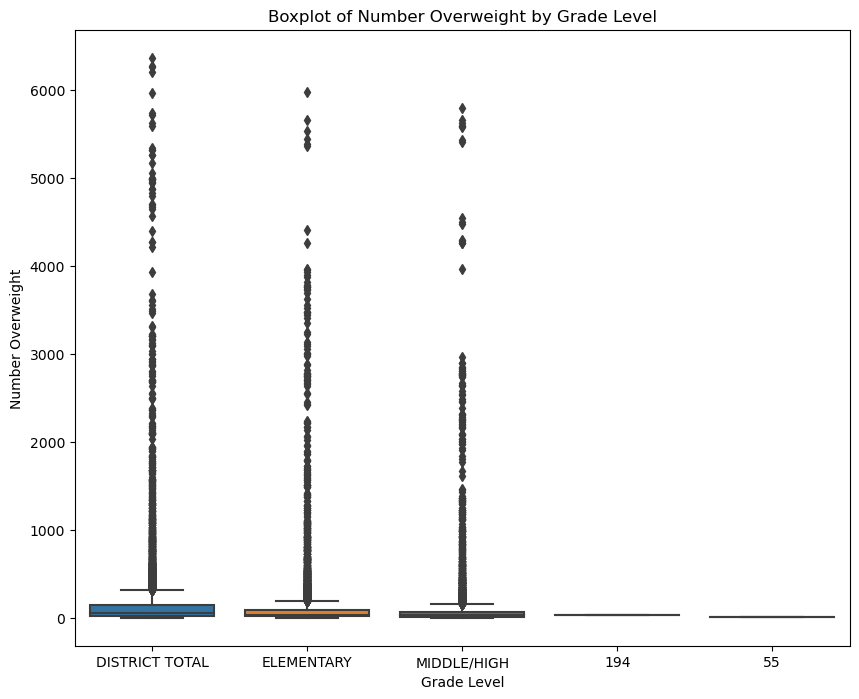

In [54]:
# Box Plot of Number Overweight by Grade level
plt.figure(figsize=(10, 8))
sns.boxplot(x='Grade Level', y='Number Overweight', data=df_no_outliers)
plt.title('Boxplot of Number Overweight by Grade Level')
plt.show()


In [55]:
# As the box plot identified, we will only keep the valid grade levels 

valid_grade_levels = ['DISTRICT TOTAL', 'ELEMENTARY', 'MIDDLE/HIGH']

# Filter the DataFrame to keep only rows with valid grade levels
df_filtered = df_no_outliers[df_no_outliers['Grade Level'].isin(valid_grade_levels)]

# Display the number of rows before and after filtering
print("Number of rows before filtering:", len(df_no_outliers))
print("Number of rows after filtering:", len(df_filtered))


Number of rows before filtering: 27864
Number of rows after filtering: 27862


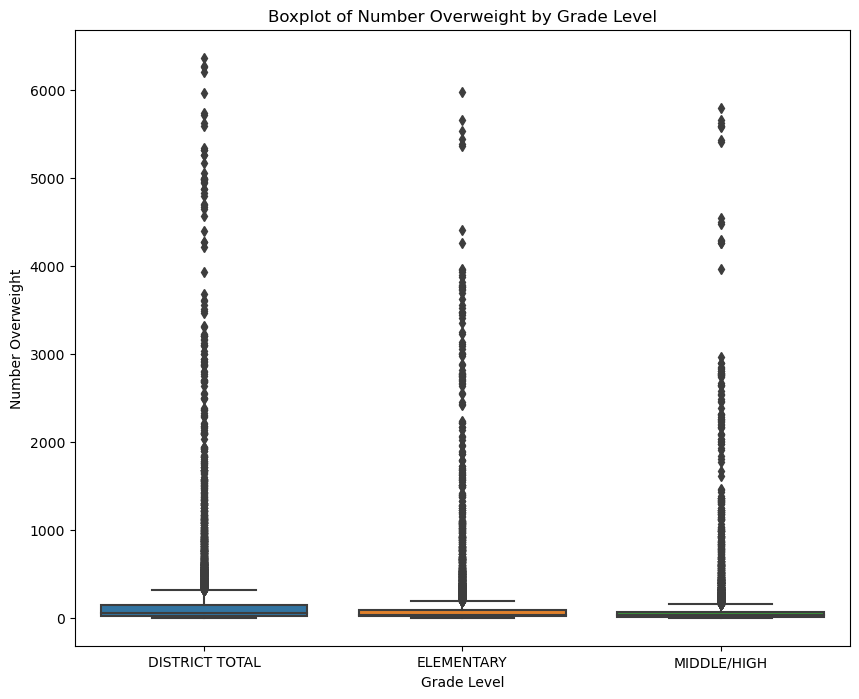

In [56]:
# Plotting again the Box Plot of Number Overweight by Grade level
plt.figure(figsize=(10, 8))
sns.boxplot(x='Grade Level', y='Number Overweight', data=df_filtered)
plt.title('Boxplot of Number Overweight by Grade Level')
plt.show()


In [57]:
df_no_outliers

,Location Code,County,Area Name,Year Reported,Number Overweight,Percent Overweight,Number Obese,Percent Obese,Number Overweight or Obese,Percent Overweight or Obese,Grade Level,Number Healthy Weight,Percent Healthy Weight,Sex
72,10000,ALBANY,ALBANY,2010-2012,1514.0,15.0,1802.0,17.9,3316.0,32.9,DISTRICT TOTAL,6563.0,0.651,ALL
73,10000,ALBANY,ALBANY,2010-2012,737.0,15.0,836.0,17.0,1573.0,32.0,DISTRICT TOTAL,3233.0,0.657,FEMALE
74,10000,ALBANY,ALBANY,2010-2012,777.0,15.1,966.0,18.7,1743.0,33.8,DISTRICT TOTAL,3330.0,0.645,MALE
75,10000,ALBANY,ALBANY,2010-2012,855.0,15.6,895.0,16.4,1750.0,32.0,ELEMENTARY,3615.0,0.661,ALL
76,10000,ALBANY,ALBANY,2010-2012,421.0,16.0,412.0,15.6,833.0,31.6,ELEMENTARY,1735.0,0.659,FEMALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32020,680801,YATES,DUNDEE CENTRAL SCHOOL DISTRICT,2018-2019,12.0,17.9,17.0,25.4,29.0,43.3,ELEMENTARY,38.0,0.567,FEMALE
32021,680801,YATES,DUNDEE CENTRAL SCHOOL DISTRICT,2018-2019,14.0,19.2,17.0,23.3,31.0,42.5,ELEMENTARY,42.0,0.575,MALE
32022,680801,YATES,DUNDEE CENTRAL SCHOOL DISTRICT,2018-2019,15.0,16.7,21.0,23.3,36.0,40.0,MIDDLE/HIGH,54.0,0.600,ALL
32023,680801,YATES,DUNDEE CENTRAL SCHOOL DISTRICT,2018-2019,7.0,16.3,7.0,16.3,14.0,32.6,MIDDLE/HIGH,29.0,0.674,FEMALE


In [58]:
# Calculate the correlation matrix
corr_matrix = df_no_outliers.corr()

# Print the correlation matrix numerically
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                             Location Code  Number Overweight  \
Location Code                     1.000000           0.012257   
Number Overweight                 0.012257           1.000000   
Percent Overweight               -0.060547           0.002877   
Number Obese                      0.009614           0.987376   
Percent Obese                    -0.088682          -0.041580   
Number Overweight or Obese        0.010955           0.996811   
Percent Overweight or Obese      -0.098847          -0.031757   
Number Healthy Weight             0.014704           0.989778   
Percent Healthy Weight            0.073843          -0.002290   

                             Percent Overweight  Number Obese  Percent Obese  \
Location Code                         -0.060547      0.009614      -0.088682   
Number Overweight                      0.002877      0.987376      -0.041580   
Percent Overweight                     1.000000     -0.006571       0.200921   
Number Ob

C:\Users\SARVESH\AppData\Local\Temp\ipykernel_2652\424992630.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_no_outliers.corr()


In [59]:
# From the above correlation matrix, We will identify and drop the uncorrelated columns

columns_to_drop = ['Location Code', 'Percent Overweight', 'Percent Obese', 'Percent Overweight or Obese']
df_no_outliers_dropped = df_no_outliers.drop(columns=columns_to_drop)

print(df_no_outliers_dropped.head())


    County Area Name Year Reported   Number Overweight  Number Obese  \
72  ALBANY    ALBANY      2010-2012             1514.0        1802.0   
73  ALBANY    ALBANY      2010-2012              737.0         836.0   
74  ALBANY    ALBANY      2010-2012              777.0         966.0   
75  ALBANY    ALBANY      2010-2012              855.0         895.0   
76  ALBANY    ALBANY      2010-2012              421.0         412.0   

    Number Overweight or Obese     Grade Level  Number Healthy Weight  \
72                      3316.0  DISTRICT TOTAL                 6563.0   
73                      1573.0  DISTRICT TOTAL                 3233.0   
74                      1743.0  DISTRICT TOTAL                 3330.0   
75                      1750.0      ELEMENTARY                 3615.0   
76                       833.0      ELEMENTARY                 1735.0   

    Percent Healthy Weight     Sex  
72                   0.651     ALL  
73                   0.657  FEMALE  
74               

In [60]:
# One hot encoding to categorical columns

import pandas as pd

# Convert 'Grade Level' and 'Sex' to categorical
df_no_outliers_dropped['Grade Level'] = pd.Categorical(df_no_outliers_dropped['Grade Level'])
df_no_outliers_dropped['Sex'] = pd.Categorical(df_no_outliers_dropped['Sex'])

# Apply one-hot encoding to 'Grade Level' and 'Sex'
df_encoded = pd.get_dummies(df_no_outliers_dropped, columns=['Grade Level', 'Sex'], drop_first=True)


In [61]:
# Normalizing numeric columns

from sklearn.preprocessing import MinMaxScaler

non_categorical_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()

df_normalized = df_encoded.copy()
df_normalized[non_categorical_columns] = scaler.fit_transform(df_encoded[non_categorical_columns])


In [62]:
# Saving the Preprocessed data file
df_normalized.to_csv('preprocessed_Student_dataset.csv', index=False)

In [63]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target variable (Y)
features = ['Number Overweight', 'Number Obese', 'Number Overweight or Obese', 'Number Healthy Weight']
target = 'Percent Healthy Weight'

X = df_normalized[features]
y = df_normalized[target]

# Splitting the data into training (80%), testing (10%), and validation (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Printing the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)


X_train shape: (22291, 4)
y_train shape: (22291,)
X_test shape: (2786, 4)
y_test shape: (2786,)
X_validation shape: (2787, 4)
y_validation shape: (2787,)


## Step 2: ML Models

### Evaluating the models on Test set

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Initialize and train Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

# Initialize and train Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)

# Initialize and train Support Vector Regression model
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)

# Print Mean Squared Error for each model
print("Random Forest Regression MSE:", rf_mse)
print("Gradient Boosting Regression MSE:", gb_mse)
print("Support Vector Regression MSE:", svr_mse)



Random Forest Regression MSE: 0.0011931789741783478
Gradient Boosting Regression MSE: 0.0024908368378061974
Support Vector Regression MSE: 0.007415276127261311


In [65]:
# Calculate R-squared for each model
rf_r2 = rf_model.score(X_test, y_test)
gb_r2 = gb_model.score(X_test, y_test)
svr_r2 = svr_model.score(X_test, y_test)

# Print R-squared values
print("Random Forest Regression R-squared:", rf_r2)
print("Gradient Boosting Regression R-squared:", gb_r2)
print("Support Vector Regression R-squared:", svr_r2)

Random Forest Regression R-squared: 0.9509582071164286
Gradient Boosting Regression R-squared: 0.8976221447494241
Support Vector Regression R-squared: 0.6952188700290628


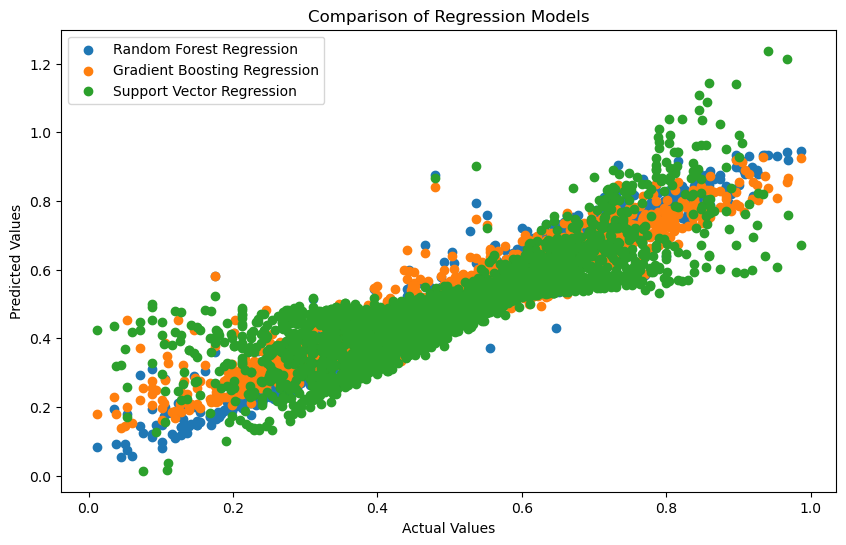

In [66]:
# Plotting predictions vs. actual values for comparison
plt.figure(figsize=(10, 6))

plt.scatter(y_test, rf_pred, label='Random Forest Regression')
plt.scatter(y_test, gb_pred, label='Gradient Boosting Regression')
plt.scatter(y_test, svr_pred, label='Support Vector Regression')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()

### Evaluating Models on Validation set

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Initialize and train Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_validation)
rf_mse = mean_squared_error(y_validation, rf_pred)

# Initialize and train Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_validation)
gb_mse = mean_squared_error(y_validation, gb_pred)

# Initialize and train Support Vector Regression model
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_validation)
svr_mse = mean_squared_error(y_validation, svr_pred)

# Print Mean Squared Error for each model
print("Random Forest Regression MSE:", rf_mse)
print("Gradient Boosting Regression MSE:", gb_mse)
print("Support Vector Regression MSE:", svr_mse)

Random Forest Regression MSE: 0.0010203648950937825
Gradient Boosting Regression MSE: 0.0022648386145966352
Support Vector Regression MSE: 0.006873319897591691


In [68]:
# Calculate R-squared for each model
rf_r2 = rf_model.score(X_validation, y_validation)
gb_r2 = gb_model.score(X_validation, y_validation)
svr_r2 = svr_model.score(X_validation, y_validation)

# Print R-squared values
print("Random Forest Regression R-squared:", rf_r2)
print("Gradient Boosting Regression R-squared:", gb_r2)
print("Support Vector Regression R-squared:", svr_r2)

Random Forest Regression R-squared: 0.9568188521631188
Gradient Boosting Regression R-squared: 0.9041535714195795
Support Vector Regression R-squared: 0.7091257803407623


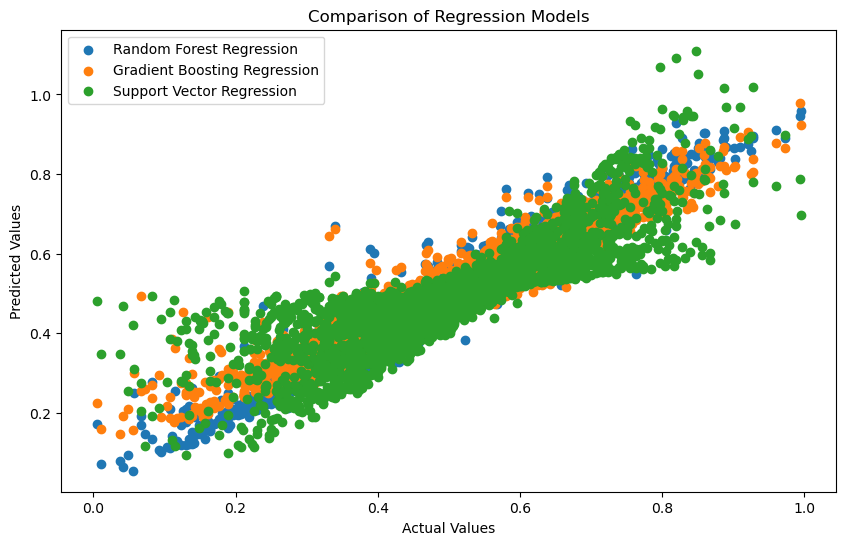

In [69]:
# Plot predictions vs. actual values for comparison
plt.figure(figsize=(10, 6))

plt.scatter(y_validation, rf_pred, label='Random Forest Regression')
plt.scatter(y_validation, gb_pred, label='Gradient Boosting Regression')
plt.scatter(y_validation, svr_pred, label='Support Vector Regression')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()

### Plot of MSE and R2 Score for 3 models (comparison)

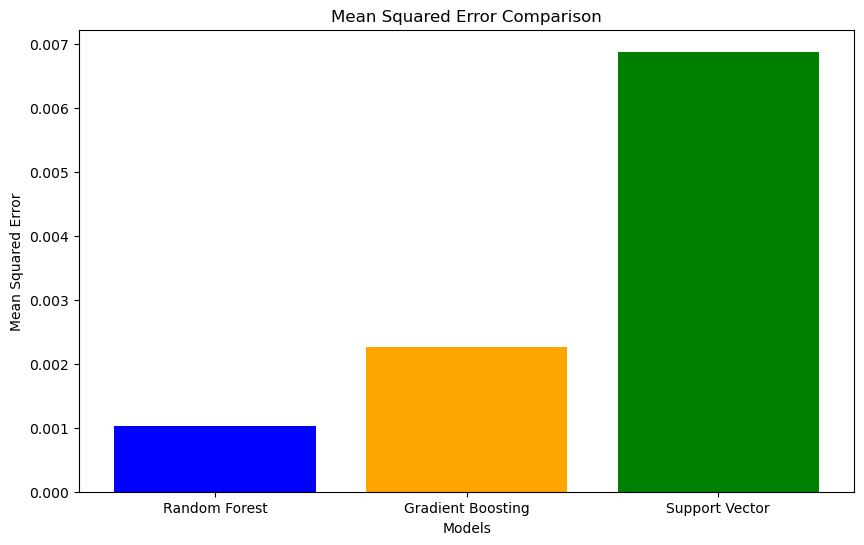

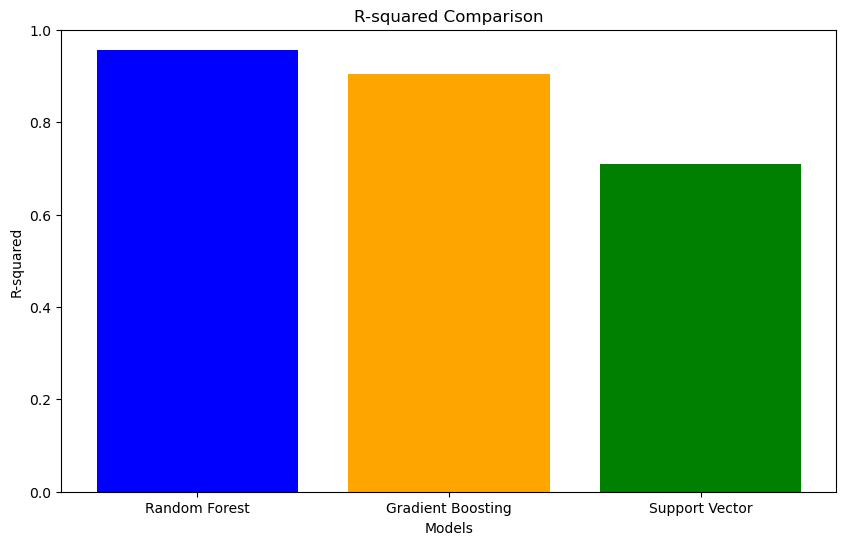

In [70]:
import numpy as np

# Bar plot for Mean Squared Error (MSE)
mse_values = [rf_mse, gb_mse, svr_mse]
models = ['Random Forest', 'Gradient Boosting', 'Support Vector']

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green'])
plt.title('Mean Squared Error Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()

# Bar plot for R-squared scores
r2_values = [rf_r2, gb_r2, svr_r2]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['blue', 'orange', 'green'])
plt.title('R-squared Comparison')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.ylim(0, 1)  # R-squared values range from 0 to 1
plt.show()
